In [597]:
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
import pandas as pd
import numpy as np
import re
import time
from datetime import datetime
import itertools
import statistics
from datetime import date
import re

In [598]:
car="civic"
year_from='2018'
year_to='2019'

In [599]:
Url='https://www.pakwheels.com/used-cars/search/-/ct_karachi/rg_karachi/yr_'+year_from+'_'+year_to+'/leased_0/?page='+str(1000)+'+&q='+car+'&sortby=price%20asc'
req = Request(Url, headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(req).read()
soup = BeautifulSoup(webpage, 'html')
pages=int(soup.find('li', {'class':['page active']}).find('a').get_text())
print(pages)

2


In [600]:
Ads_List=[]
Ads_Dict = ['name','price','vehicleModelDate','mileageFromOdometer_km','fuelType','vehicleEngine','vehicleTransmission']
Ads_Dict_list=[]
Rate_List=[]
page=1
while page<=pages:
    Url='https://www.pakwheels.com/used-cars/search/-/ct_karachi/rg_karachi/yr_'+year_from+'_'+year_to+'/leased_0/?page='+str(page)+'+&q='+car+'&sortby=price%20asc'
    req = Request(Url, headers={'User-Agent': 'Mozilla/5.0'})
    webpage = urlopen(req).read()
    soup = BeautifulSoup(webpage, 'html')
    len([Ads_List.append(x) for x in soup.find_all('div', {'class':['col-md-9 grid-style']})])
    page+=1

In [601]:
Url

'https://www.pakwheels.com/used-cars/search/-/ct_karachi/rg_karachi/yr_2018_2019/leased_0/?page=2+&q=civic&sortby=price%20asc'

In [602]:
for ad in Ads_List:
    if ad.find('meta', {'itemprop':['price']}) is None:
        print(ad.find('meta', {'itemprop':['price']}) is None)

True
True
True
True
True


In [603]:
try:
    for idx,ad in enumerate(Ads_List):
        temp_dict={key: None for key in Ads_Dict}
        temp_dict['name']=ad.find('meta', {'itemprop':['name']})['content']
        if ad.find('meta', {'itemprop':['price']}) is not None:
            temp_dict['price']=ad.find('meta', {'itemprop':['price']})['content']
        else:
            temp_dict['price']="Call"
        temp_dict['vehicleModelDate']=ad.find('li', {'itemprop':["vehicleModelDate"]}).get_text()
        temp_dict['mileageFromOdometer_km']=int(ad.find('li', {'itemprop':["mileageFromOdometer"]}).get_text().replace(" km","").replace(",",""))        
        temp_dict['fuelType']=ad.find('li', {'itemprop':["fuelType"]}).get_text()
        temp_dict['vehicleEngine']=ad.find('li', {'itemprop':["vehicleEngine"]}).get_text()
        temp_dict['vehicleTransmission']=ad.find('li', {'itemprop':["vehicleTransmission"]}).get_text()
        Ads_Dict_list.append(temp_dict)
except:
    print("Exception Caught")
# for ad in Ads_Dict_list:
#     for header in Ads_Dict: 
#         print(ad[header])
Rate_List=[int(x['price']) for x in Ads_Dict_list if x['price']!="Call"]
print(len(Rate_List))

37


In [604]:
Ads_df=pd.DataFrame(Ads_Dict_list)
Ads_df

,fuelType,mileageFromOdometer_km,name,price,vehicleEngine,vehicleModelDate,vehicleTransmission
0,Petrol,14000,Honda Civic 2018 Oriel 1.8 i-VTEC CVT,2975000,1800 cc,2018,Automatic
1,Petrol,6500,Honda Civic 2018 Oriel 1.8 i-VTEC CVT,3075000,1800 cc,2018,Automatic
2,Petrol,9000,Honda Civic 2018 Oriel 1.8 i-VTEC CVT,3075000,1800 cc,2018,Automatic
3,Petrol,10000,Honda Civic 2018 Oriel 1.8 i-VTEC CVT,3150000,1800 cc,2018,Automatic
4,Petrol,6500,Honda Civic 2018 Oriel 1.8 i-VTEC CVT,3175000,1800 cc,2018,Automatic
5,Petrol,10000,Honda Civic 2018 Oriel 1.8 i-VTEC CVT,3200000,1800 cc,2018,Automatic
6,Petrol,9625,Honda Civic 2018 Oriel 1.8 i-VTEC CVT,3240000,1800 cc,2018,Automatic
7,Petrol,14000,Honda Civic 2018 Oriel 1.8 i-VTEC CVT,3250000,1800 cc,2018,Automatic
8,Petrol,19000,Honda Civic 2018 Oriel 1.8 i-VTEC CVT,3250000,1800 cc,2018,Automatic
9,Petrol,30,Honda Civic 2019 Oriel 1.8 i-VTEC CVT,3250000,1800 cc,2019,Automatic


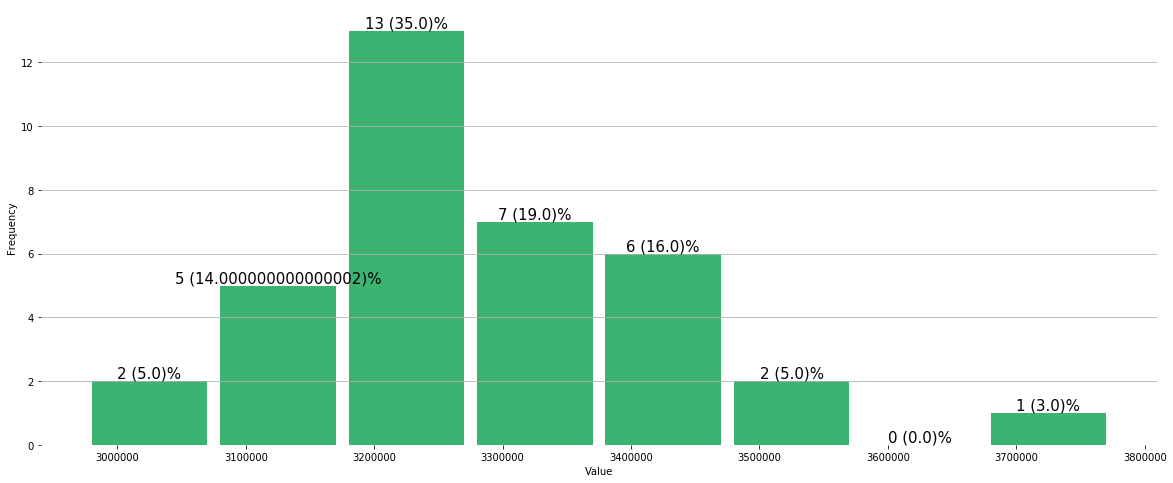

In [605]:
import matplotlib.pyplot as plt

bin_size=100000

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=Rate_List, bins=range(min(Rate_List),max(Rate_List),+bin_size), color='#3cb371',rwidth=.9,joinstyle='bevel')
plt.grid(axis='y')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.box(False)
labels=n
fig = plt.gcf()
fig.set_size_inches(20,8)

for rect, label in zip(patches, n):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, str(int(label))+' ('+str(round(int(label)/len(Rate_List),2)*100)+')%',fontsize=15,
            ha='center', va='bottom')

plt.show()

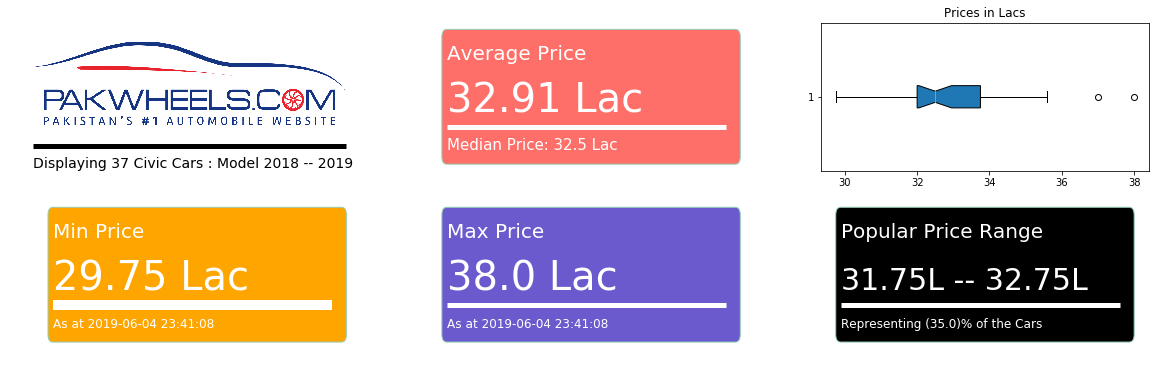

In [617]:
import matplotlib.transforms as mtransforms
from matplotlib.patches import FancyBboxPatch

#CALCULATING STATISTICS

Plots=len(Rate_List)
Average_Price=statistics.mean(Rate_List)/100000
Median_Price=statistics.median(Rate_List)/100000
Min_Price=min(Rate_List)/100000
Max_Price=max(Rate_List)/100000
popular_price_range=str(bins[n.argmax()]/100000)+"L -- "+str((bins[n.argmax()]+bin_size)/100000)+"L"
popular_price_range_perc="("+str(round(int(n.max())/len(Rate_List),2)*100)+")%"

#PLOTING KPIS

fig, axes = plt.subplots(nrows=2,ncols=3, figsize=(20,6))

width=3
height=0.8

from PIL import Image
img = Image.open('car_2.png')
img = img.resize((1500,400), Image.ANTIALIAS)
axes[0][0].imshow(img)
axes[0][0].text(0,600,'Displaying '+str(len(Rate_List))+" "+car.capitalize()+' Cars : Model '+str(year_from)+" -- "+str(year_to) ,size=14, color = "#000000")
axes[0][0].hlines(y =500 , xmin=0, xmax=1500, linewidth=5, color = "#000000")
axes[0][0].axis('off')
# axes[0][0].ylim([-1,1])

p_fancy = FancyBboxPatch(xy= (0.1, 0.1), width= width,height= height, boxstyle="round,pad=0.05", fc= "#FF6F69", ec= "#96CEB4")
axes[0][1].add_patch(p_fancy)
axes[0][1].text(0.1, 0.4,str(format(round(Average_Price,2)))+" Lac",size=40, color = "#ffffff")
axes[0][1].text(0.1, 0.75, "Average Price",size=20, color = "#ffffff")
axes[0][1].text(0.1, 0.15, "Median Price: "+str(format(round(Median_Price,2)))+" Lac",size=15, color = "#ffffff")
axes[0][1].hlines(y = 0.3, xmin=0.1, xmax=width, linewidth=5, color = "#ffffff")
axes[0][1].axis('off')

# p_fancy = FancyBboxPatch(xy= (0.1, 0.1), width= width,height= height, boxstyle="round,pad=0.05", fc= "#3cb371", ec= "#96CEB4")
# axes[0][2].add_patch(p_fancy)
axes[0][2].boxplot([x/100000 for x in Rate_List],patch_artist=True,vert=False,notch=True)
axes[0][2].set_title('Prices in Lacs')
# axes[0][2].ylabel('Price in Lacs')


p_fancy = FancyBboxPatch(xy= (0.1, 0.1), width= width,height= height, boxstyle="round,pad=0.05", fc= "#ffa500", ec= "#96CEB4")
axes[1][0].add_patch(p_fancy)
axes[1][0].text(0.1, 0.4,str(format(round(Min_Price,2)))+" Lac",size=40, color = "#ffffff")
axes[1][0].text(0.1, 0.75, "Min Price",size=20, color = "#ffffff")
axes[1][0].text(0.1, 0.15,"As at "+str(datetime.now().strftime('%Y-%m-%d %H:%M:%S')) ,size=12, color = "#ffffff")
axes[1][0].hlines(y = 0.3, xmin=0.1, xmax=width, linewidth=10, color = "#ffffff")
axes[1][0].axis('off')

p_fancy = FancyBboxPatch(xy= (0.1, 0.1),width= width,height= height, boxstyle="round,pad=0.05", fc= "#6a5acd", ec= "#96CEB4")
axes[1][1].add_patch(p_fancy)
axes[1][1].text(0.1, 0.4,str(format(round(Max_Price,2)))+" Lac",size=40, color = "#ffffff")
axes[1][1].text(0.1, 0.75, "Max Price",size=20, color = "#ffffff")
axes[1][1].text(0.1, 0.15,"As at "+str(datetime.now().strftime('%Y-%m-%d %H:%M:%S')) ,size=12, color = "#ffffff")
axes[1][1].hlines(y = 0.3, xmin=0.1, xmax=width, linewidth=5, color = "#ffffff")
axes[1][1].axis('off')

p_fancy = FancyBboxPatch(xy= (0.1, 0.1), width= width,height= height, boxstyle="round,pad=0.05", fc= "#000000", ec= "#96CEB4")
axes[1][2].add_patch(p_fancy)
axes[1][2].text(0.1, 0.4,popular_price_range,size=30, color = "#ffffff")
axes[1][2].text(0.1, 0.75, "Popular Price Range",size=20, color = "#ffffff")
axes[1][2].text(0.1, 0.15,"Representing "+popular_price_range_perc+" of the Cars" ,size=12, color = "#ffffff")
axes[1][2].hlines(y = 0.3, xmin=0.1, xmax=width, linewidth=5, color = "#ffffff")
axes[1][2].axis('off')

# for ax in axes:
#     ax.xaxis.set_visible(False)
#     ax.yaxis.set_visible(False)
    
#     for pos in ['top','right','left','bottom']:
#         ax.spines[pos].set_visible(False)

fig.show()

